## 3 Covariance and correlation

We will look at $\text{Var}\left(\frac{X}{\sigma_Y}\pm\frac{Y}{\sigma_Y}\right)$. This is always non-negative, because a variance has to be non-negative. From the lecture we already know $\text{Var}(aX)=a^2\text{Var}(X)$ and $\text{Cov}(aX,bY)=ab\text{Cov}(X,Y)$ and $\text{Var}(X+Y)=\text{Var}(X)+\text{Var}(Y)+2\text{Cov}(X,Y)$. With this we get:
\begin{align*}
&\text{Var}\left(\frac{X}{\sigma_Y}\pm\frac{Y}{\sigma_Y}\right) \\=& \text{Var}\left(\frac{X}{\sigma_X}\right)+\text{Var}\left(\frac{Y}{\sigma_Y}\right)\pm2\text{Cov}\left(\frac{X}{\sigma_X},\frac{Y}{\sigma_Y}\right)\\=&\frac{\text{Var}(X)}{\sigma_X^2}+\frac{\text{Var}(Y)}{\sigma_Y^2}\pm2\frac{\text{Cov}(X,Y)}{\sigma_X\sigma_Y}\\ =& 2\pm2\rho(X,Y)\geq0
\end{align*}
This can be easily rearranged as:
\begin{align*}
    -1\leq\rho(X,Y)\leq+1
\end{align*}

## 4 Correlation Between CO$_2$ levels and Earth’s surface temperature

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [233]:
time=pd.read_csv('monthly_in_situ_co2_mlo.csv',skiprows=59,usecols=[3],delimiter=",")
co2=pd.read_csv('monthly_in_situ_co2_mlo.csv',skiprows=59,usecols=[4],delimiter=",")
co2=co2.to_numpy()
time=time.to_numpy()

co2_annual=[]
k=0
count=0
for idx,i in enumerate(time): 
    if co2[idx]>0:
        k+=co2[idx]
        count+=1
    if (idx%12==0) & (idx!=0):
        co2_annual.append(k/count)
        k=0
        count=0
    

yr=np.linspace(1958,2022,65)
temp=pd.read_csv('temp.csv',skiprows=79,usecols=[13],delimiter=",")
yr_t=pd.read_csv('temp.csv',skiprows=79,usecols=[0],delimiter=",")
yr_t=yr_t.to_numpy()
temp=temp.to_numpy()
temp=temp[:-1]
yr_t=yr_t[:-1]
for idx,i in enumerate(temp):
    temp[idx]=float(i)

In [234]:
#variances
def var(X):
    return np.sum((np.mean(X)-X)**2)/(len(X))
temp_var=var(temp)
co2_var=var(co2_annual)
#covariance
def cov(X,Y):
    return np.mean(X*Y)-np.mean(X)*np.mean(Y)
co2_annual=np.asarray(co2_annual)
corr=cov(co2_annual,temp)/(co2_var**0.5*temp_var**0.5)
print(corr)

0.961713608600864


The correlation coefficient between annual CO$_2$ levels and temperature deviation is $$\rho=\frac{\text{COV}(T,CO_2)}{\sigma_T\sigma_{CO_2}}=0.96$$

Text(0.5, 1.0, 'Visualization of the correlation')

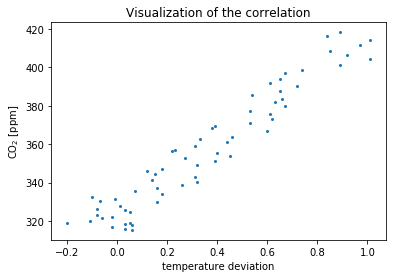

In [235]:
##temp vs co2 levels
plt.scatter(temp,co2_annual,s=4)
plt.xlabel("temperature deviation")
plt.ylabel(r"CO$_2$ [ppm]")
plt.title("Visualization of the correlation")
# plt.legend()